<div align="center">

#  Прогнозирование непрерывных целевых переменных с помощью регрессионного анализа
## Знакомство с линейной регрессией

</div>

---


## Общая идея регрессионного анализа

* **Задача:** прогнозирование *непрерывных* целевых переменных.
* **Применение:** научные и прикладные задачи, например, прогнозирование продаж компании.
* **Отличие от классификации:**

  * Классификация → предсказывает категориальные метки (классы).
  * Регрессия → предсказывает значения на *непрерывной шкале*.

## Простая (одномерная) линейная регрессия

* **Модель:** взаимосвязь между **одним признаком (x)** и **целевой переменной (y)**.

* **Уравнение модели:**

  $$
  y = w_1x + b
  $$

  где:

  * $w_1$ — вес (коэффициент) признака,
  * $b$ — смещение (*bias*), точка пересечения с осью $y$.

* **Суть задачи:** найти такие $w_1$ и $b$, которые:

  * лучше всего описывают зависимость между $x$ и $y$;
  * позволяют прогнозировать $y$ для новых значений $x$.

* **Ключевые понятия:**

  * **линия регрессии (regression line)** — «наиболее подходящая прямая»;
  * **остатки (residuals)** — ошибки прогноза (расстояние от точки данных до линии регрессии).

## Множественная линейная регрессия

* **Обобщение:** модель учитывает **несколько независимых предикторов** ($x_1, x_2, ..., x_n$).
* **Уравнение модели:**

  $$
  y = w_1x_1 + w_2x_2 + \dots + w_nx_n + b
  $$
* **Интерпретация:**

  * геометрически модель описывает не прямую, а **гиперплоскость** в многомерном пространстве;
  * визуализация возможна только при малом числе признаков (2–3), в более высоких измерениях её невозможно показать напрямую.

## Важные выводы

* Простая и множественная линейная регрессии основаны на одних и тех же принципах:

  * поиск коэффициентов $w$ и смещения $b$,
  * минимизация ошибок прогноза (остатков).
* Методы оценки и реализации в коде одинаково применимы для обоих типов моделей.
* Для обучения модели используются **обучающие примеры** (набор данных с известными входами и выходами).

---



## Ames Housing — подготовка к линейной регрессии

**Датасет:** 2930 домов, 80 признаков (Эймс, Айова, 2006–2010).
**Цель:** предсказать *SalePrice* (цена продажи).

### Признаки для работы:

* **OverallQual** – качество материала/отделки (1–10).
* **OverallCond** – общее состояние (1–10).
* **GrLivArea** – жилая площадь (кв. футы).
* **TotalBsmtSF** – площадь подвала (кв. футы).
* **CentralAir** – центральный кондиционер (Y/N).
* **SalePrice** – целевая переменная (\$).

### Шаги:

1. Загрузка и предобработка данных.
2. Сделать EDA (разведочный анализ): распределения, scatter plot, корреляции.
3. Подготовить признаки → обучать линейную регрессию.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [15]:
# Загрузка данных
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']

df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt',
                 sep = '\t',
                 usecols = columns)
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [16]:
# Проверим и убедимся, что строк 2930
df.shape

(2930, 6)

In [17]:
# Преобразование категориальной переменной через .map()
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,1,1656,215000
1,5,6,882.0,1,896,105000
2,6,6,1329.0,1,1329,172000
3,7,5,2110.0,1,2110,244000
4,5,5,928.0,1,1629,189900


In [18]:
# Проверка фрейма на пропущенные значения
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [19]:
# Удалим строку с пропущенным значением, так как у нас их много
df = df.dropna(axis = 0)
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

## Шаг 2. Исследовательский анализ данных (EDA)


### Зачем нужен EDA?

* **Определение:** EDA (Exploratory Data Analysis) — первый шаг перед обучением модели.
* **Задачи:**

  * выявить **выбросы** (outliers),
  * изучить **распределение данных**,
  * оценить **связи между признаками**.

EDA помогает заранее понять, как данные могут повлиять на обучение модели и стоит ли применять предварительную обработку (например, нормализацию или удаление выбросов).

### Инструменты EDA

* Простые и полезные методы графического анализа:

  * **гистограммы** — форма распределения признака;
  * **boxplot (ящик с усами)** — выявление выбросов;
  * **scatterplot (диаграмма рассеяния)** — взаимосвязь между двумя переменными;
  * **scatterplot matrix** — сразу все попарные взаимосвязи.

### Scatterplot Matrix

* **Что это?** Матрица диаграмм рассеяния → отображает все возможные пары признаков в виде точечных графиков.

* **Цель:**

  * быстро оценить **корреляции** между признаками,
  * заметить **линейные зависимости**,
  * визуально увидеть **аномалии**.

* **Реализация в Python:**
  Используем `scatterplotmatrix` из библиотеки **mlxtend**.


### Что ожидаем увидеть

* Линейные тренды (например, `GrLivArea` ↔ `SalePrice`).
* Возможные нелинейные связи.
* Выбросы (дома с непропорционально большой площадью или низкой ценой).


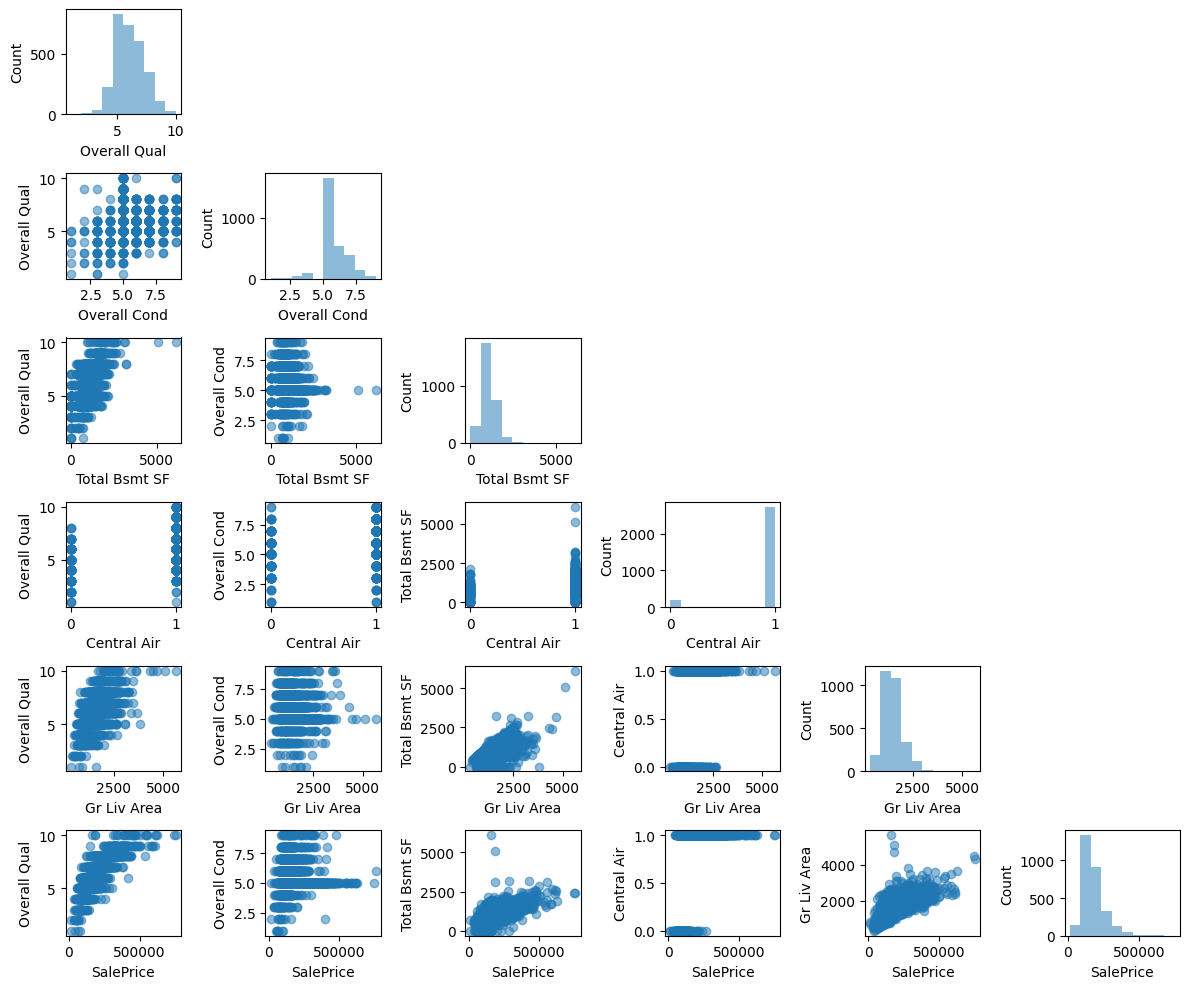

In [20]:
# Матрица диаграммы рассеяния
scatterplotmatrix(df.values, figsize = (12, 10),
                  names = df.columns, alpha = 0.5)
plt.tight_layout()
plt.show()

### Итоги анализа scatterplot matrix

1. **GrLivArea** и **OverallQual** — лучшие предикторы цены.
2. **SalePrice, GrLivArea, TotalBsmtSF** — имеют выбросы и смещённые распределения.
3. **CentralAir** — полезный бинарный признак, но дисбалансированный (почти все дома с кондиционером).

### Предположение о нормальности

* Для обучения **линейной регрессии** *не требуется*, чтобы предикторы или целевая переменная были нормально распределены.
* Нормальность важна только для некоторых **статистических тестов и проверки гипотез**, а не для самой модели.

---


# Матрица корреляции

## Определение

* **Матрица корреляции** — квадратная таблица, содержащая коэффициенты корреляции между всеми парами признаков.
* Основана на **коэффициенте корреляции Пирсона (r)**, который измеряет линейную зависимость.

## Связь с ковариацией

* Корреляция — это **масштабированная ковариация**.
* Если признаки **стандартизированы** (среднее = 0, σ = 1), то корреляция = ковариация.

## Значения коэффициента Пирсона

* $r = 1$ → полная положительная линейная связь.
* $r = 0$ → связи нет.
* $r = -1$ → полная отрицательная линейная связь.

Формула:

$$
r = \frac{\sum_{i=1}^n (x_i - \mu_x)(y_i - \mu_y)}{\sqrt{\sum_{i=1}^n (x_i - \mu_x)^2 \cdot \sum_{i=1}^n (y_i - \mu_y)^2}}
$$

где

* $\mu_x, \mu_y$ — средние значения признаков,
* числитель = ковариация,
* знаменатель = произведение стандартных отклонений.


📌 **Ключ:**
Матрица корреляции — удобный способ количественно подтвердить то, что мы увидели на scatterplot matrix: силу и направление линейных связей между признаками.

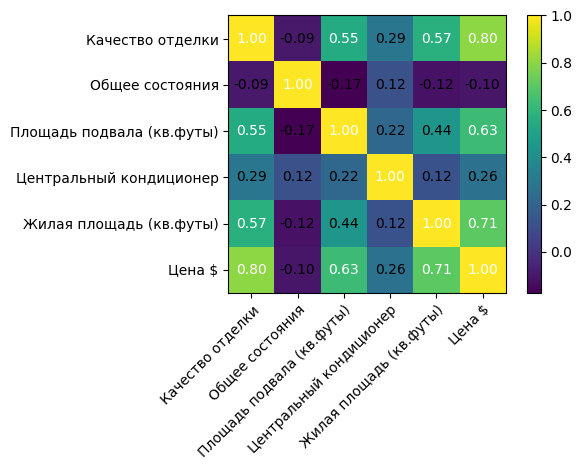

In [25]:
# Массив матрицы корреляции в виде тепловой карты
columns_rus = ['Качество отделки', 'Общее состояния', 'Площадь подвала (кв.футы)', 
               'Центральный кондиционер', 'Жилая площадь (кв.футы)', 
               'Цена $']
cm = np.corrcoef(df.values.T)
hm = heatmap(cm, row_names = columns_rus, column_names = columns_rus)
plt.tight_layout()
plt.show()

Для обучения модели линейной регрессии нужны предикторы, которые имеют наибольшую корреляцию с нашей целевой переменной, как видно из графика матрицы корреляций в виде тепловой карты, хорошим вариантом исследовательской переменной будет `Жилая площадь (0.71)`.

---

### Линейная регрессия и метод наименьших квадратов

**Цель линейной регрессии**
   Построить прямую линию, которая **наиболее точно описывает данные**.

**Что значит «наиболее точно»**
   * Используем **метод наименьших квадратов (OLS)**.
   * Он **минимизирует сумму квадратов ошибок** — вертикальных расстояний между точками данных и линией.

**Функция потерь**

   * Среднеквадратичная ошибка (MSE) используется как функция потерь:

     $$
     \text{MSE} = \frac{1}{2n} \sum (y^{(i)} - \hat{y}^{(i)} )^2
     $$
     
   * Здесь $\hat{y}^{(i)} = w^T x^{(i)} + b$ — прогноз модели.
   * Множитель 1/2 часто добавляют для удобства в градиентном спуске.

**Обновление параметров (градиентный спуск)**

   * Весовые коэффициенты обновляются **в направлении, противоположном градиенту** функции потерь.
   * Шаг обновления регулируется **скоростью обучения**.


In [26]:
# Представление линейной регрессии без библиотек
class LinearRegressionGD:
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = X.shape[1])
        self.b_ = np.array([0.])
        self.losses_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        return self.net_input(X)

In [30]:
# Стандартизируем признаки для лучшей сходимости алгоритма GD
X = df[['Gr Liv Area']].values
y = df[['SalePrice']].values
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)
y_std = y_std.flatten() 
lr = LinearRegressionGD(eta = 0.1)
lr.fit(X_std, y_std)

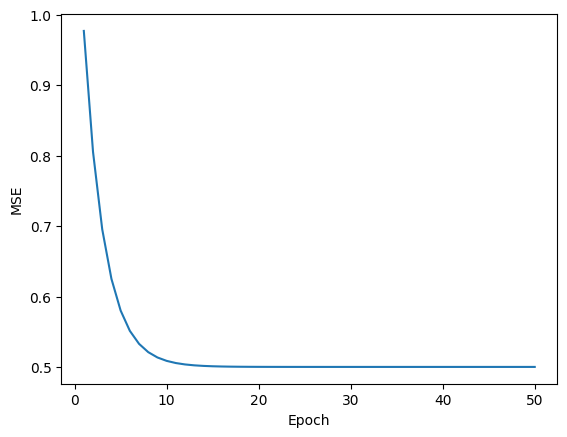

In [31]:
# Отобразим потери как функцию кол-ва эпох так как у нас GD
plt.plot(range(1, lr.n_iter + 1), lr.losses_)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

Как можно видеть, алгороритм `GD` сошелся примерно после 10 эпохи.


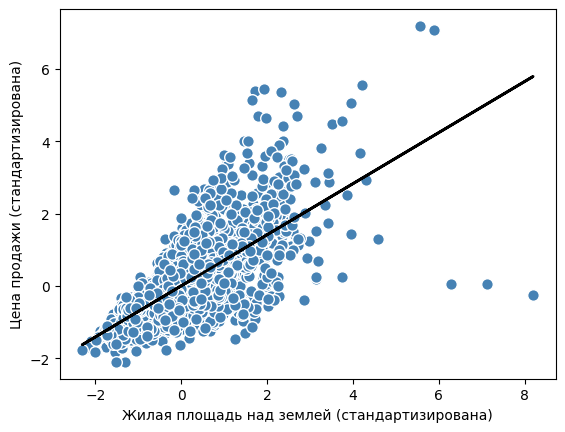

In [33]:
# Проверка насколько хорошо линия линийной регрессии подогнана
# к обучающим данным
def lin_regplot(X, y, model):
    plt.scatter(X, y, c = 'steelblue', edgecolor = 'white', s = 70)
    plt.plot(X, model.predict(X), color = 'black', lw = 2)

lin_regplot(X_std, y_std, lr)
plt.xlabel('Жилая площадь над землей (стандартизирована)')
plt.ylabel('Цена продажи (стандартизирована)')
plt.show()

Как видно на графике, **линеная регрессия** в целом отражает общую тенденцию роста `цен` на жилье с размером `жилой площади`.
Данные также говорят нам, что размер `жилой площади` во многих случаях не объясняет хорошо `цену` на жилье.
Также можно наблюдать **выбросы** в виде 3 точек.

---

Важно ещё применить обратно масштабирование, чтобы увидеть прогнозирумые результаты в исходной шкале с помощью метода `inverse_transform`

In [35]:
# Обратное масштабирование
feature_std = sc_x.transform(np.array([[2500]]))
target_std = lr.predict(feature_std)
target_reverted = sc_y.inverse_transform(target_std.reshape(-1, 1))
print(f'SalePrice: ${target_reverted.flatten()[0]:.2f}')

SalePrice: $292507.07


В качестве примера мы использовали ранее обученую модель для прогноза `цены` на дом с `жилой площадью` (2500 кв.футов). Такой дом согласно прогнозу будет стоить 292507.07$.

Если данные стандартизированы (среднее = 0, стандартное отклонение = 1), то линия регрессии проходит через начало координат. То есть смещение b всегда 0, и его можно не обновлять при обучении.

<div align="center">


## Реализация регрессионной модели в scikit-learn

</div>

---

Реализация линеной регрессии в `scikit-learn` работает с нестандартизированными признаками, поскольку не использует оптимизацию **GD**, поэтому данный шаг можно пропустить.

In [39]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print(f'Наклон: {slr.coef_[0]:.3f}')
print(f'Пересечение: {slr.intercept_:.3f}')

Наклон: 111.666
Пересечение: 13342.979


Результат `LR` получил другие коэфиценты, поскольку признаки не были стандартизованы, но в наглядном сравнение одинаково хорошо соответсвует данным.

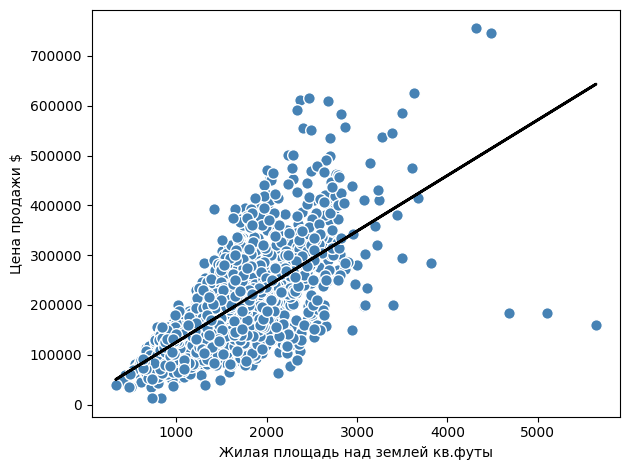

In [40]:
lin_regplot(X, y, slr)
plt.xlabel('Жилая площадь над землей кв.футы')
plt.ylabel('Цена продажи $')
plt.tight_layout()
plt.show()

<div align="center">


## Обучение устойчивой регрессионной модели с использованием RANSAC

</div>

---

### Влияние выбросов на линейную регрессию
**Проблема:**

   * Выбросы могут сильно **исказить коэффициенты** модели.
   * Иногда небольшое число точек сильно влияет на результаты.

**Решения:**

   * Можно удалять выбросы, но это требует **суждения специалиста** и знаний предметной области.
   * Альтернатива — **устойчивая регрессия** с алгоритмом **RANSAC**, который обучает модель только на «хороших» данных (inliers), противоположность: **outliers** — точки, которые сильно отклоняются от общей тенденции и могут исказить модель.


**Алгоритм RANSAC (упрощённо):**

   1. Случайно выбрать набор точек и обучить на них модель.
   2. Проверить остальные точки и добавить к inliers те, что подходят под допуск.
   3. Переобучить модель на всех inliers.
   4. Оценить ошибку модели.
   5. Если ошибка низкая или достигнут лимит итераций — завершить; иначе повторить шаги 1–4.

In [43]:
# Алгоритм RANSAC (RANdom SAmple Consensus)
ransac = RANSACRegressor(
    LinearRegression(),
    max_trials = 100, # default value (максиим. кол-во итераций)
    min_samples = 0.95, # миним. кол-во выбранных обуч. примеров
    residual_threshold = None, # default value
    random_state = 123
)
ransac.fit(X, y)

,estimator,LinearRegression()
,min_samples,0.95
,residual_threshold,None
,is_data_valid,None
,is_model_valid,None
,max_trials,100
,max_skips,inf
,stop_n_inliers,inf
,stop_score,inf
,stop_probability,0.99
,loss,'absolute_error'


> Параметр `residual_threshold` по умолчанию использует оценку MAD (медианное абсолютное отклонение целевых значений **y**) для выбора порогового значения. И выбор подходящего порога инлаера зависит от конкретной задачи, что является одним из недостатков.

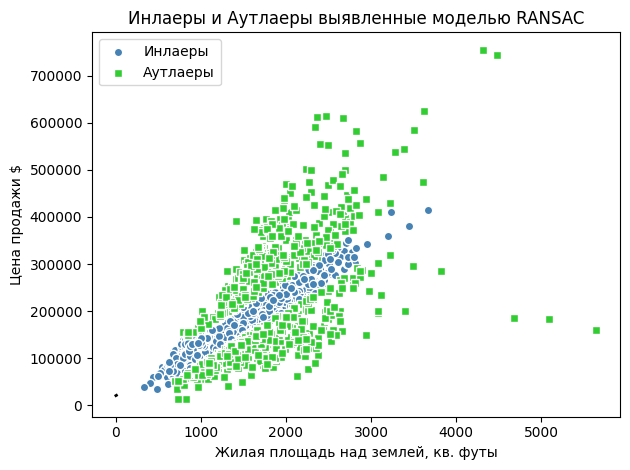

In [47]:
# Получим инлаеры и аутлаеры и построим их вместе с LR
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c = 'steelblue', edgecolor = 'white',
            marker = 'o', label = 'Инлаеры')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c = 'limegreen', edgecolor = 'white',
            marker = 's', label = 'Аутлаеры')
plt.plot(line_X, line_y_ransac, color = 'black', lw = 2)
plt.xlabel('Жилая площадь над землей, кв. футы')
plt.ylabel('Цена продажи $')
plt.legend(loc = 'upper left')
plt.title('Инлаеры и Аутлаеры выявленные моделью RANSAC')
plt.tight_layout()
plt.show()

Как видно на рисунке модель линейной регрессии была обучена на подобранном подмножестве инлаеров.

In [49]:
# Наклон и точка пересечения линии регрессии будет отличаться
# от обычной модели линейной регрессии
print(f'Наклон: {ransac.estimator_.coef_[0]:.3f}')
print(f'Пересечение: {ransac.estimator_.intercept_:.3f}')

Наклон: 106.348
Пересечение: 20190.093


In [51]:
# RANSAC использовал MAD для вычисления порога между инлаерами 
# и аутлаерами, так как мы поставили None 
# MAD можно рассчитать:
def median_absolute_deviation(data):
    return np.median(np.abs(data - np.median(data)))

median_absolute_deviation(y)

np.float64(37000.0)

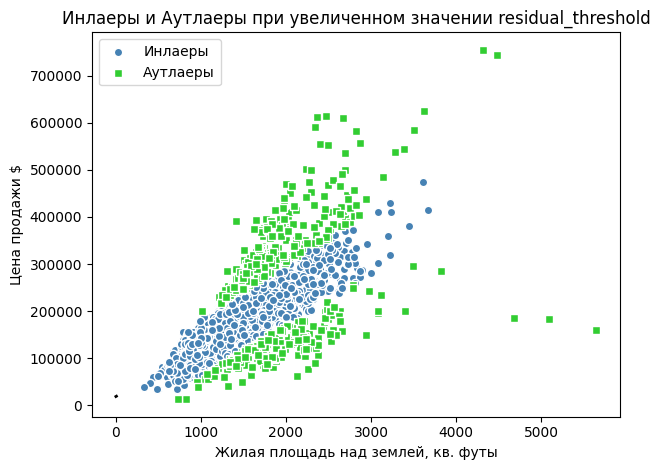

In [54]:
# Если мы хотим пометить как выбросы меньшее кол-во точек, 
# необходимо выбрать значение residual_threshold больше, 
# чем предыдущее МАD.

ransac2 = RANSACRegressor(
    LinearRegression(),
    max_trials = 100, # default value (максиим. кол-во итераций)
    min_samples = 0.95, # миним. кол-во выбранных обуч. примеров
    residual_threshold = 65000, 
    random_state = 123
)
ransac2.fit(X, y)

inlier_mask = ransac2.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac2.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c = 'steelblue', edgecolor = 'white',
            marker = 'o', label = 'Инлаеры')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c = 'limegreen', edgecolor = 'white',
            marker = 's', label = 'Аутлаеры')
plt.plot(line_X, line_y_ransac, color = 'black', lw = 2)
plt.xlabel('Жилая площадь над землей, кв. футы')
plt.ylabel('Цена продажи $')
plt.legend(loc = 'upper left')
plt.title('Инлаеры и Аутлаеры при увеличенном значении residual_threshold')
plt.tight_layout()
plt.show()

> Чтобы понять, сможет ли RANSAC эффективно прогнозировать на новых данных, после уменьшения влияния выбросов, нужно оценить производительность модели.

<div align="center">


## Оценка производительности моделей линейной регрессии

</div>

---


### Проверка модели и множественная регрессия

**Разделение данных:**

   * Делим данные на **обучающий набор** (для обучения модели) и **тестовый набор** (для проверки, как модель обобщается на новых данных).

**Множественная регрессия:**

   * Используем все пять признаков одновременно.
   * Модель теперь учитывает несколько независимых переменных.

**Визуализация:**

   * Линию регрессии нельзя показать на обычном 2D-графике (это гиперплоскость).
   * Зато можно строить **графики остатков (residual plots)**: разность между фактическими и прогнозируемыми значениями.

**Зачем нужны графики остатков:**

   * Проверка **нелинейности**, **выбросов** и **случайного распределения ошибок**.

In [57]:
# Обучим с разделением данных
target = 'SalePrice'
features = df.columns[df.columns != target]
X = df[features].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 123
)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

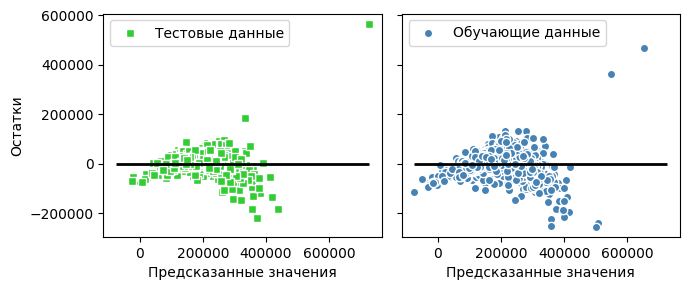

In [58]:
# График остатков
x_max = np.max(
    [np.max(y_train_pred), np.max(y_test_pred)]
)
x_min = np.min(
    [np.min(y_train_pred), np.min(y_test_pred)]
)

fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize = (7, 3), sharey = True)

ax1.scatter(
    y_test_pred, y_test_pred - y_test,
    c = 'limegreen', marker = 's',
    edgecolor = 'white',
    label = 'Тестовые данные')
ax2.scatter(
    y_train_pred, y_train_pred - y_train,
    c = 'steelblue', marker = 'o',
    edgecolor = 'white',
    label = 'Обучающие данные')
ax1.set_ylabel('Остатки')

for ax in (ax1, ax2):
    ax.set_xlabel('Предсказанные значения')
    ax.legend(loc = 'upper left')
    ax.hlines(y = 0, xmin = x_min-100, xmax = x_max+100, \
             color = 'black', lw = 2)
plt.tight_layout()
plt.show()

### Остатки в регрессии

* В идеале остатки равны нулю, но в реальных данных это почти никогда не так.
* У хорошей модели ошибки и остатки **случайны и равномерно распределены** вокруг нуля.
* **Закономерности в остатках** сигнализируют, что модель упустила часть информации.
* **Выбросы** можно заметить как точки с большим отклонением от нулевой линии.


---


### Среднеквадратическая ошибка (MSE)

* **MSE** — это мера, показывающая, насколько сильно прогнозы модели отклоняются от фактических значений.
* Формула без 1/2 (часто для удобства в градиентном спуске):

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y^{(i)} - \hat{y}^{(i)})^2
$$

* MSE можно использовать для **оценки модели**, как точность в классификации.
* Часто **нормализуется на размер выборки**, чтобы сравнивать разные наборы данных (например, при построении кривых обучения).


In [61]:
# Вычислим MSE при обучении и тесте
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE при обучении: {mse_train:.2f}')
print(f'MSE при тестировании: {mse_test:.2f}')

MSE при обучении: 1497216245.85
MSE при тестировании: 1516565821.00


### MSE, MAE и переобучение

* **MSE** на обучающих данных обычно меньше, чем на тестовых — это **признак переобучения**.
* Иногда удобнее показывать ошибку в **исходных единицах**:

  * **RMSE (корень из MSE)**
  * **MAE (средняя абсолютная ошибка):**

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y^{(i)} - \hat{y}^{(i)}|
$$

* MAE меньше выделяет сильные ошибки и проще интерпретируется.

In [64]:
# Вычислим MAE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'MAE при обучении: {mae_train:.2f}')
print(f'MAE при тестировании: {mae_test:.2f}')

MAE при обучении: 25983.03
MAE при тестировании: 24921.29


In [67]:
# Вычислим коэффицент Детерминации
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'R^2 на обучении: {train_r2:.2f}')
print(f'R^2 на тесте: {test_r2:.2f}')

R^2 на обучении: 0.77
R^2 на тесте: 0.75


### MAE, MSE и коэффициент детерминации $R^2$

* **MAE и MSE** не имеют верхней границы, их величина зависит от масштаба признаков.
* Для удобства интерпретации используют **$R^2$** — долю дисперсии целевой переменной, объяснённой моделью:

$$
R^2 = 1 - \frac{SSE}{SST}
$$

* $SSE$ — сумма квадратов ошибок.

* $SST$ — сумма квадратов отклонений от среднего (дисперсия отклика).

* Свойства $R^2$:

  * $R^2 = 1$ → модель идеально предсказывает (MSE = 0).
  * $R^2 = 0$ → модель не лучше, чем среднее значение.
  * $R^2 < 0$ → модель хуже, чем горизонтальная линия (часто при переобучении или неправильном масштабировании).

* В нашем случае:

  * $R^2 = 0.77$ (train) → модель объясняет 77% дисперсии.
  * $R^2 = 0.75$ (test) → немного хуже, значит есть лёгкое переобучение.


---

<div align="center">

## Использование методов регуляризации для регресии

</div>


**Зачем нужна:**

* Борется с **переобучением**, уменьшая значения весов.
* В функцию потерь добавляется штраф за сложность модели.


#### **Ridge (гребневая регрессия, L2)**

$$
L(w) = \text{MSE} + \lambda \sum_j w_j^2
$$

* Штрафует **квадрат весов**.
* Уменьшает, но не обнуляет веса.
* Хорошо, если все признаки полезны.


#### **LASSO (L1)**

$$
L(w) = \text{MSE} + \lambda \sum_j |w_j|
$$

* Штрафует **абсолютные значения весов**.
* Может обнулять некоторые веса → **отбор признаков**.
* Ограничение: выбирает ≤ n признаков, если признаков больше, чем объектов.


#### **Эластичная сеть (Elastic Net)**

$$
L(w) = \text{MSE} + \lambda_1 \sum_j |w_j| + \lambda_2 \sum_j w_j^2
$$

* Комбинация **L1 и L2**.
* Может выбирать больше признаков, чем объектов.
* Балансирует между Ridge и LASSO.

Все методы есть в **scikit-learn**.
Обычно силу регуляризации ($\lambda$) подбирают через **k-fold кросс-валидацию**.

In [68]:
# Модель Гребневой регрессии 
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1.0)

In [69]:
# Регрессор LASSO
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1.0)

In [71]:
# Изменения соотношений L1, L2 через Эластичную сеть
from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha = 1.0, l1_ratio = 0.5)
# Если установим l1_ratio равным 1.0, регрессор будет равен регрессии LASSO